<a href="https://colab.research.google.com/github/therudradev/Python_Programming/blob/main/Flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment: 21
## EDA project 2 - Flight price prediction -  Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Excel file
df = pd.read_excel("/content/flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Basic overview
df.shape

(10683, 11)

In [4]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [5]:
# Summary statistics:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Data Cleaning

In [6]:
# Missing values before cleaning
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [7]:
# dropping null values
df.dropna(subset = ["Route","Total_Stops"],inplace = True)

In [8]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [9]:
df['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


In [10]:
# analyzing date
df['Date_of_Journey']

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019
...,...
10678,9/04/2019
10679,27/04/2019
10680,27/04/2019
10681,01/03/2019


In [11]:
df['day'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['year'] = df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [12]:
del df['Date_of_Journey']

In [13]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [14]:
df['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


In [15]:
del df['Route']

In [16]:
df['departure hours'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['departure min'] = df['Dep_Time'].str.split(':').str[1].astype(int)

In [17]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,departure hours,departure min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [18]:
del df['Dep_Time']

In [19]:
df['Arrival hours'] = df['Arrival_Time'].str.split(" ").str[0].str.split(":").str[0].astype(int)
df['Arrival min'] = df['Arrival_Time'].str.split(" ").str[0].str.split(":").str[1].astype(int)

In [20]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,departure hours,departure min,Arrival hours,Arrival min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [21]:
del df['Arrival_Time']

In [22]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [23]:
df['Duration']= df['Duration'].replace('5m','0h 5m')

In [24]:
df['Duration'].value_counts()

,count
Duration,
2h 50m,550
1h 30m,386
2h 55m,337
2h 45m,337
2h 35m,329
...,...
30h 10m,1
31h 30m,1
42h 5m,1


In [25]:
df['DH'] = df['Duration'].str.split('h').str[0].astype(int)*60

In [26]:
df['DM'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0].fillna('0').astype(int)

In [27]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,month,year,departure hours,departure min,Arrival hours,Arrival min,DH,DM
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,120,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,420,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,1140,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,300,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,240,45


In [28]:
df['Total Duration'] = df['DH'] + df['DM']

In [29]:
del df['Duration']
del df['DH']
del df['DM']
del df['Additional_Info']

In [30]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,departure hours,departure min,Arrival hours,Arrival min,Total Duration
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,285


In [31]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [32]:
df['Total_Stops'] = df['Total_Stops'].str.replace("non-stop","0")
df['Total_Stops'] = df['Total_Stops'].str.replace("1 stop","1")
df['Total_Stops'] = df['Total_Stops'].str.replace("2 stops","2")
df['Total_Stops'] = df['Total_Stops'].str.replace("3 stops","3")
df['Total_Stops'] = df['Total_Stops'].str.replace("4 stops","4")
df.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,departure hours,departure min,Arrival hours,Arrival min,Total Duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


In [33]:
df['Total_Stops'].astype(int)

,Total_Stops
0,0
1,2
2,2
3,1
4,1
...,...
10678,0
10679,0
10680,0
10681,0


In [34]:
p =  df.groupby('Airline')['Price'].mean().sort_values(ascending = False).head(10)

In [35]:
p

,Price
Airline,
Jet Airways Business,58358.666667
Jet Airways,11643.923357
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9612.427756
Vistara Premium economy,8962.333333
Vistara,7796.348643
GoAir,5861.056701
IndiGo,5673.682903


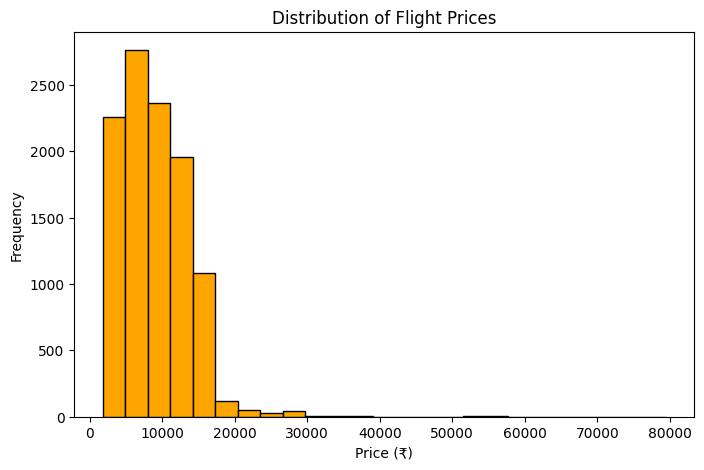

In [36]:
# Price Distribution
plt.figure(figsize=(8,5))
plt.hist(df["Price"], bins=25, color="orange", edgecolor="black")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Flight Prices")
plt.show()

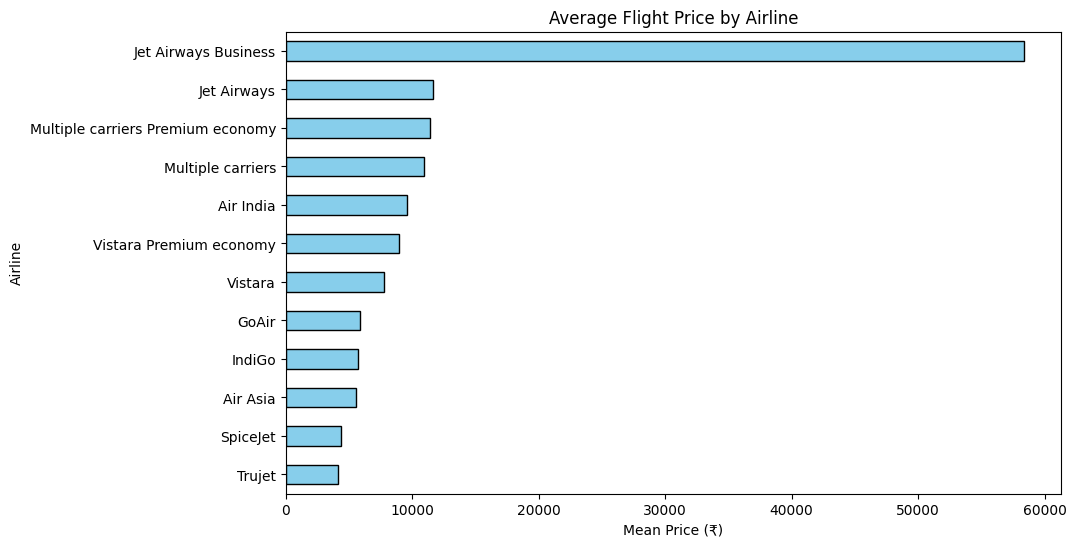

In [37]:
#  Airline vs Average Price
mean_price = df.groupby("Airline")["Price"].mean().sort_values()

plt.figure(figsize=(10,6))
mean_price.plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("Mean Price (₹)")
plt.title("Average Flight Price by Airline")
plt.show()

<Figure size 700x500 with 0 Axes>

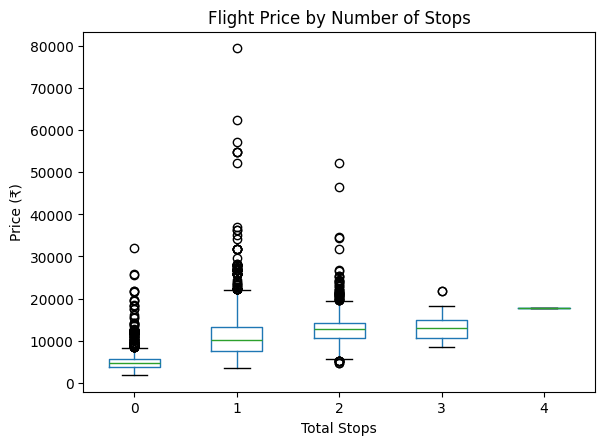

In [38]:
# Total Stops vs Price (Boxplot)
plt.figure(figsize=(7,5))
df.boxplot(column="Price", by="Total_Stops", grid=False)
plt.title("Flight Price by Number of Stops")
plt.suptitle("")
plt.xlabel("Total Stops")
plt.ylabel("Price (₹)")
plt.show()

In [39]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,departure hours,departure min,Arrival hours,Arrival min,Total Duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


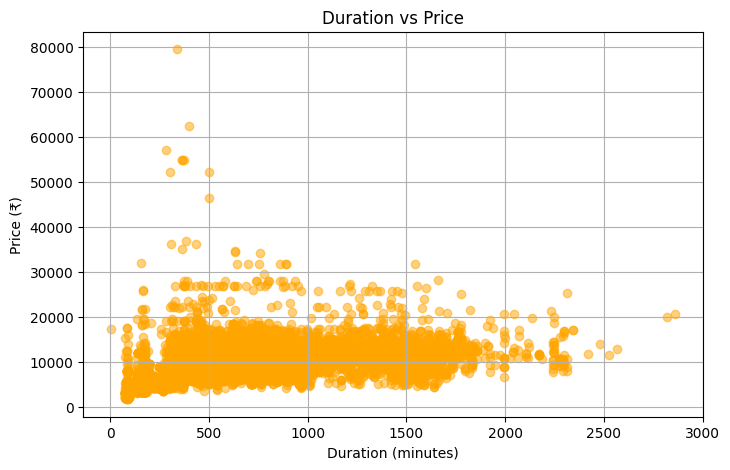

In [40]:
#  Duration vs Price (Scatter)

plt.figure(figsize=(8,5))
plt.scatter(df["Total Duration"], df["Price"], color="orange", alpha=0.5)
plt.xlabel("Duration (minutes)")
plt.ylabel("Price (₹)")
plt.title("Duration vs Price")
plt.grid(True)
plt.show()

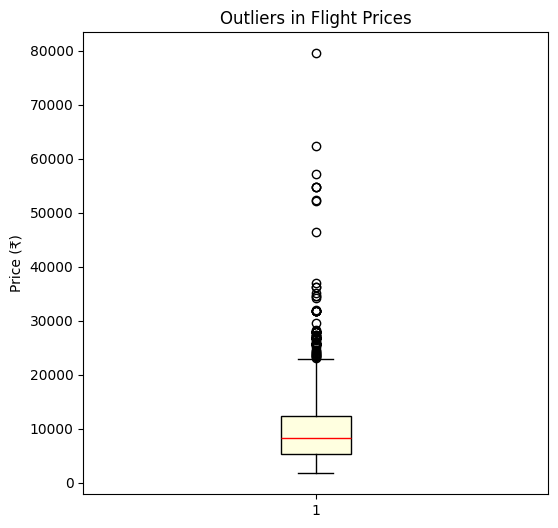

In [41]:
#  Outliers in Price (Boxplot)
plt.figure(figsize=(6,6))
plt.boxplot(df["Price"], patch_artist=True,
    boxprops=dict(facecolor="lightyellow", color="black"),
    medianprops=dict(color="red"))
plt.title("Outliers in Flight Prices")
plt.ylabel("Price (₹)")
plt.show()

In [42]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,departure hours,departure min,Arrival hours,Arrival min,Total Duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


<Figure size 1000x600 with 0 Axes>

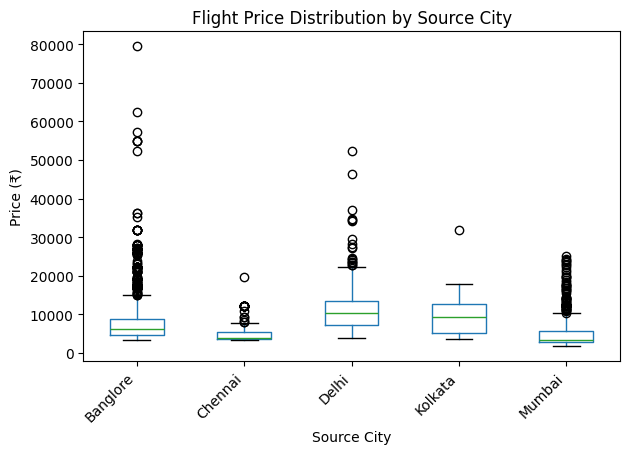

In [43]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Price', by='Source', grid=False)
plt.title('Flight Price Distribution by Source City')
plt.suptitle('')
plt.xlabel('Source City')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the main task, the next step is to analyze the distribution of flight prices by 'Destination' city using a box plot.



<Figure size 1000x600 with 0 Axes>

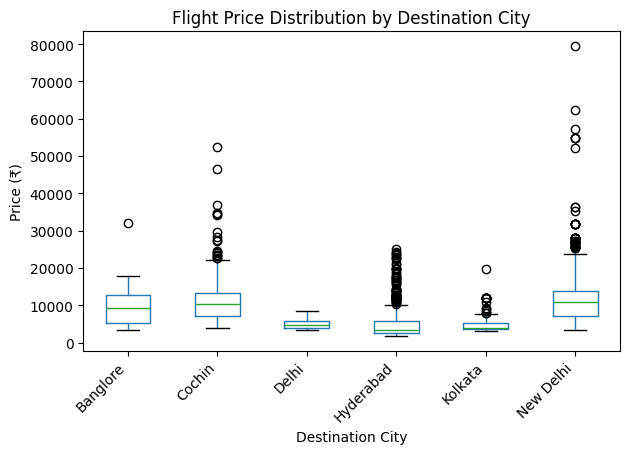

In [44]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Price', by='Destination', grid=False)
plt.title('Flight Price Distribution by Destination City')
plt.suptitle('')
plt.xlabel('Destination City')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()